ValueError: Could not save to JPEG for display

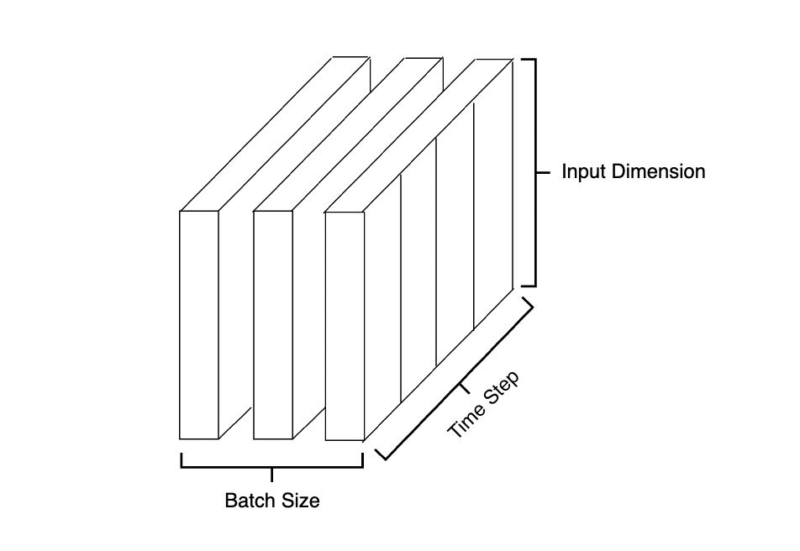

In [18]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from tensorflow import keras
from PIL import Image
import os

Image.open('../picture/lstm.png')


**what is input and output shape**
我試著用Kernel去了解LSTM 網絡的輸入和輸出形狀。在文章中可能會一半英文，一半中文，有時候英文比較好理解，有時候反之。那就開始吧!<br>
LSTM是3D array，第一dimension代表"the batch size"，第二維度是代表時間步數(time-step)的數量，通常會餵一些sequence(序列)，第三維度是代表輸入序列中的單元數(the number of units)
>input shape:(batch_size,time_steps,seq_len)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units= 3,input_shape=(2,10)))

OK，我們來解釋解釋。<br>
LSTM 剛剛說是三維的陣列，但是現在看到的感覺是二維LSTM(unit,input_shape)
在上面的例子，input_shape(2,10)，時間步數(二維)為 2，輸入單元數(三維)為 10
但你也可以加入batch_size(一維)一次丟多少資料進去訓練

額外: epochs總共要訓練幾次

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units= 5,batch_input_shape=(8,2,10), return_sequences=False))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (8, 5)                    320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p>output shape: (8,5)</p>
LSTM 中輸出單元(units)的數量是5，輸入訓練的數目(batch_size)是8

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units= 5,batch_input_shape=(8,2,10), return_sequences=True))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (8, 2, 5)                 320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p>output shape: (8,2,5)</p>
LSTM 中輸出單元(units)的數量是5，輸入訓練的數目(batch_size)是8，在中間的時間步數(time-step)是2

* LSTM 是三維
* LSTM 的輸出(output)可以是二維-array或是三維-array，依照 return_sequence argument
* retrun_sequence=True : output => 三維
* retrun_sequence=False : output => 二維